### Linear Regression

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming X is correctly structured as samples with two features each
X = np.array([[45, 9], [50, 10], [63, 12], [70, 8], [80, 4]])
#X = np.array([-10, -8, -3, -1, 2, 8]).reshape(-1, 1)
#Y = np.array([5, 5, 4, 3, 2, 2]).reshape(-1, 1)
# Assuming Y should have samples as rows and targets as columns
# Adjusted Y to match common usage patterns for LinearRegression with multiple targets
Y = np.array([[6, 5], [9, 6], [8, 9], [3, 2], [2, 4]])

# Initialize and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict using a sample with the correct shape
y_pred = model.predict([[63,9]])  # Note the double brackets to create a 2D array
print(y_pred)

print(model.coef_)
print(model.intercept_)

[[5.7661 5.5284]]
[[-0.0718  0.6665]
 [ 0.0325  0.7073]]
[ 4.2897 -2.8824]


### Mean Squared Errors

In [51]:
from sklearn.metrics import mean_squared_error
Y_pred = model.predict(X)

# Calculate the MSE for each output
mse_output_1 = mean_squared_error(Y[:, 0], Y_pred[:, 0])
mse_output_2 = mean_squared_error(Y[:, 1], Y_pred[:, 1])

print("Mean Squared Error for output 1:", mse_output_1)
print("Mean Squared Error for output 2:", mse_output_2)

Mean Squared Error for output 1: 1.4030198896178283
Mean Squared Error for output 2: 2.6545038008955535


In [84]:
# Even-determined system (m = d) Demo 3

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank

X = np.array([[1, 1], [1, -2]])
y = np.array([4, 1])
w = inv(X) @ y
print(w)

[3. 1.]


In [85]:
#Over-determined system (m > d) Demo 4

import numpy as np
from numpy.linalg import inv
X = np.array([[4, -3, 6], [1, 0, 10]])
y = np.array([1, 0, 2])
w = inv(X.T @ X) @ X.T 
print(w)

[[ 0.125   0.25  ]
 [-0.375   0.5   ]
 [ 0.0137  0.0645]]


In [ ]:
#Under-determined system 2 (m < d) Example 3

import numpy as np
from numpy.linalg import inv
from numpy.linalg import matrix_rank
from numpy.linalg import det

X = np.array([[1, 2, 3], [1, -2, 3]])
y = np.array([2, 1])
w = X.T @ inv(X@ X.T) @ y
print(w)

### Linear Classification (Binary)

In [52]:
import numpy as np
from numpy.linalg import inv

#Have to include the bias term
X = np.array([[1,4], [1,7], [1,10], [1,2], [1,3], [1, 9]])
y = np.array([[-1], [-1], [-1], [1], [1], [1]])
w = inv(X.T @ X) @ X.T @ y
print("Estimated w")
print(w)
training_out = X@w
print("Training out")
print(training_out)
Xt = np.array([[1,6]])
y_predict = Xt @ w
print("Predicted y")
print(y_predict)
y_class_predict = np.sign(y_predict)
print("Predicted y class")
print(y_class_predict)

Estimated w
[[ 0.7447]
 [-0.1277]]
Training out
[[ 0.234 ]
 [-0.1489]
 [-0.5319]
 [ 0.4894]
 [ 0.3617]
 [-0.4043]]
Predicted y
[[-0.0213]]
Predicted y class
[[-1.]]


### Linear Classification (Multi class)

In [43]:
import numpy as np
from numpy.linalg import inv
from sklearn.preprocessing import OneHotEncoder

#Have to include the bias term
X = np.array([[1, 1, 3, -2], [1, -4, 0, -1], [1, 3, 1, 8], [1, 2, 1, 6],[1, 8, 4, 6] ]) 
#X = np.array()
y_class = np.array([[1], [1], [2], [3], [3]])
y = np.array([[1, 0, 0],[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1]])
# print("One-hot encoding manual")
# print(y_class)
# print(y_onehot)
w = inv(X.T @ X) @ X.T @ y
#w = X.T @ inv(X@ X.T) @ y
print(w)

Xt = np.array([1,1,-2,4])
y_predict = Xt @ w
print("Predicted y")
print(y_predict)
onehot_encoder=OneHotEncoder(sparse_output=False)
print(onehot_encoder)
Ytr_onehot = onehot_encoder.fit_transform(y_class)
print(Ytr_onehot)

[[-0.0101 -6.0302  7.0402]
 [-0.2487 -1.7462  1.995 ]
 [ 0.4472  3.3417 -3.7889]
 [ 0.0302  1.0905 -1.1206]]
Predicted y
[ -1.0327 -10.098   12.1307]
OneHotEncoder(sparse_output=False)
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


### Polynomial Classification

In [53]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import matrix_rank
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[4], [7], [10], [2], [3], [9]]) 
y = np.array([-1, -1, -1, 1, 1, 1])
## Generate polynomial features
order = 4
poly = PolynomialFeatures(order)
P = poly.fit_transform(X)

#w_primal = inv(P.T @ P) @ P.T @ y
#w_dual = P.T @ inv(P @ P.T) @ y
#print(w_dual)
yout = P@w_primal
print(yout)
yp_class_predict = [[1 if x >=0 else -1 ] for x in yout ] 
print(yp_class_predict)
Pnew =poly.fit_transform([[6]]) 
print(Pnew) 
Ynew_poly = Pnew@w_primal
print(Ynew_poly) 

[-0.7634 -1.1183 -1.0423  1.0761  0.7465  1.1014]
[[-1], [-1], [-1], [1], [1], [1]]
[[1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]]
[-2.1198]


### Polynomial (Number of parameters)

In [83]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[1, 3, 4], [6, -1, 6], [5, 3, 3], [2, 1, 2]]) 
order = 3
poly = PolynomialFeatures(order)
P = poly.fit_transform(X[0].reshape(1, -1))
print(len(P[0]))
print(P)

20
[[ 1.  1.  3.  4.  1.  3.  4.  9. 12. 16.  1.  3.  4.  9. 12. 16. 27. 36.
  48. 64.]]


### Polynomial Classification (Multi Class)

In [11]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import matrix_rank
from sklearn.preprocessing import PolynomialFeatures
## Polynomial regression for  
## Generate polynomial features 
X = np.array([[-10], [-8], [-3], [-1], [2]])
Y = np.array([[1,0,0], [1,0,0], [0,1,0], [0,0,1], [0,1,0]]) 
order = 5 
poly = PolynomialFeatures(order) 
## only the data column (2nd) is needed for generation of polynomial terms 
P = poly.fit_transform(X) 
Xt = np.array([[-0.1], [0.4]])
Pt = poly.fit_transform(Xt) 
## dual solution (without ridge) 
Wp_dual = P.T @ inv(P @ P.T) @ Y 
print(Wp_dual) 
yp_predict = Pt @ Wp_dual 
print(yp_predict) 
yp_class_predict = [[1 if y == max(x) else 0 for y in x] for x in yp_predict ]     
print(yp_class_predict) 

[[ 3.44948975e-03 -9.43531203e-02  6.34920635e-01]
 [-3.88897256e-03  1.19190567e-01 -5.97883598e-01]
 [-7.41760392e-03  2.26945495e-01 -1.58730159e-01]
 [ 1.15336370e-03  7.73185748e-03  9.65608466e-02]
 [ 1.33775274e-03 -6.14798507e-03  2.38095238e-02]
 [ 1.05247425e-04 -4.78034174e-04  1.32275132e-03]]
[[ 0.00376319 -0.10401106  0.6930275 ]
 [ 0.00081622 -0.01003306  0.37717333]]
[[0, 0, 1], [0, 0, 1]]


### Polynomial Regression

In [22]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import matrix_rank
from sklearn.preprocessing import PolynomialFeatures
# X = np.array([-10, -8, -3, -1, 2, 8]).reshape(-1, 1)
y = np.array([5, 5, 4, 3, 2, 2]).reshape(-1, 1)
X = np.array([[1,0,1], [1,-1,1]])
y = np.array([0,1])
## Generate polynomial features
order = 3
poly = PolynomialFeatures(order)
print(poly)
P = poly.fit_transform(X)
print("matrix P")
print(P)
w_dual = P.T @ inv(P @ P.T) @ y
#w_primal = inv(P.T @ P) @ P.T @ y
print(w_dual)

# X_test = np.array([9]).reshape(-1,1)
# P_test = poly.fit_transform(X_test)
# pred_poly = P_test @ w_primal
# print(pred_poly)

# reg_L2 = 0.0001*np.identity(P.shape[0]) #number of rows of P = Dual I
# print(reg_L2)
# w_dual_ridge = P.T @ (inv(P @ P.T + reg_L2)) @ y
# print(w_dual_ridge)

# print("Approximation with primal ridge regression")
# print(P.shape)
reg_L = 0.0001*np.identity(P.shape[1]) #number of columns of P = Primal I
w_primal_ridge = inv(P.T @ P + reg_L) @ P.T @ y
print(w_primal_ridge)

PolynomialFeatures(degree=3)
matrix P
[[ 1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.
   0.  1.]
 [ 1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1.
  -1.  1.]]
[ 0.   0.  -0.1  0.   0.  -0.1  0.   0.1 -0.1  0.   0.  -0.1  0.   0.1
 -0.1  0.  -0.1  0.1 -0.1  0. ]
[ 9.99966915e-07  9.99967142e-07 -9.99980001e-02  9.99970894e-07
  9.99969188e-07 -9.99980000e-02  9.99968734e-07  9.99980000e-02
 -9.99980001e-02  9.99973167e-07  9.99969302e-07 -9.99980000e-02
  9.99968165e-07  9.99980001e-02 -9.99980000e-02  9.99969075e-07
 -9.99980001e-02  9.99980000e-02 -9.99980000e-02  9.99967597e-07]


### Pearson Correlation

In [80]:
import numpy as np 
# Features
feature_1 = np.array([-0.709, 1.7255, 0.9539, -0.7581, -1.035, -1.049])
feature_2 = np.array([2.8719, 1.5014, 1.8365, -0.5467, 1.8274, 0.3501])
feature_3 = np.array([-1.8349, 0.4055, 1.0118, 0.5171, 0.7279, 1.2654])
feature_4 = np.array([2.6354, 2.7448, 1.4616, 0.7258, -1.6893, -1.7512])

# Target
target_y = np.array([0.8206, 1.0639, 0.6895, -0.0252, 0.995, 0.6608])

def calc_pearson_correlation(a, b):
    cov_ab = np.sum((a - a.mean()) * (b - b.mean())) / len(a)
    return cov_ab / (a.std() * b.std() + 1e-8)

print(calc_pearson_correlation(feature_1, target_y))
print(calc_pearson_correlation(feature_2, target_y))
print(calc_pearson_correlation(feature_3, target_y))
print(calc_pearson_correlation(feature_4, target_y))

0.35431366022592226
0.7542315997194405
-0.1358858969252995
0.0871718814416474


### Gradient Descent

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

print(3*math.sin(math.exp(3))*math.sin(math.exp(3))*math.exp(3)*math.cos(math.exp(3)))
print(math.exp(3))

17.662110237748184
20.085536923187668


In [100]:
x = 3
for i in range(0,3):
 x= x-0.1*3*math.sin(math.exp(x))*math.sin(math.exp(x))*math.exp(x)*math.cos(math.exp(x))
 print(x)

1.2337889762251815
1.3158756779729237
1.6011472035819008


In [58]:
x = 3
y = 2
# Do one at a time cus X affects Y
# have to separate gradient with regards to x and y
for i in range(0,1):
 x= x-0.2*(2*x + y*y)
 #y= y -0.2*(2*x*y)
 print(x)
 print(y)

1.0
2


### Regression Tree

In [59]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

def our_own_tree(y):

    # split data at first level
    # L stands for left, R stands for right
    yL, yR = find_best_split(y)

    # compute prediction
    yL_pred = np.mean(yL)*np.ones(len(yL))
    yR_pred = np.mean(yR)*np.ones(len(yR))

    y_pred = np.concatenate([yL_pred, yR_pred])

    return y_pred

#Go through all possible thresholds to determine the best split based on MSE
def find_best_split(y):

    # index represents last element in the below threshold node
    sq_err_vec = np.zeros(len(y)-1)
    meansq_err_vec = np.zeros(len(y)-1)
    for index in range(0, len(y)-1):

        # split the data
        data_below_threshold = y[:index+1]
        data_above_threshold = y[index+1:]

        # Compute estimate
        mean_below_threshold = np.mean(data_below_threshold)
        mean_above_threshold = np.mean(data_above_threshold)

        # Compute total square error
        # Note that MSE = total square error divided by number of data points
        below_sq_err = np.sum(np.square(data_below_threshold - mean_below_threshold))
        above_sq_err = np.sum(np.square(data_above_threshold - mean_above_threshold))
        sq_err_vec[index] = below_sq_err + above_sq_err
        meansq_err_vec[index] = sq_err_vec[index]/len(y)

    #print out MSE
    print('MSE list')
    print(meansq_err_vec)
    best_index = np.argmin(meansq_err_vec)
    yL = y[:best_index+1]
    yR = y[best_index+1:]
    print('Minimum MSE = '+str(meansq_err_vec[best_index])+' at threshold index '+str(best_index+1))
    return yL, yR


#main
S = np.array([0.2, 0.7, 1.8, 2.2, 3.7, 4.1, 4.5, 5.1, 6.3, 7.4])
P = np.array([2.1, 1.5, 5.8, 6.1, 9.1, 9.5, 9.8, 12.7, 13.8, 15.9])

#sort
sort_index = S.argsort()
S = S[sort_index]
P = P[sort_index]

# scikit decision tree regressor
scikit_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=1)
# Focus on House Size
scikit_tree.fit(S.reshape(-1,1), P) # reshape necessary because tree expects 2D array
scikit_tree_predict = scikit_tree.predict(S.reshape(-1,1))

# Our own tree regressor
tree_predict = our_own_tree(P)

MSE list
[15.9002  8.9759  7.6895  5.5648  6.874   7.6138  7.6581 10.966  14.7656]
Minimum MSE = 5.56475 at threshold index 4


### MSE of Regression trees (Check both Up and Down)

In [81]:

y = [5,13,15,25,6,16,2,19]
tot = 0
for i in y:
    tot += i

yb = 13.5

tot1 = 0
for i in y:
    tot1 += (i - yb)*(i - yb)

print(tot1/len(y))

54.0


### Classification Tree

Training accuracy:  1.0


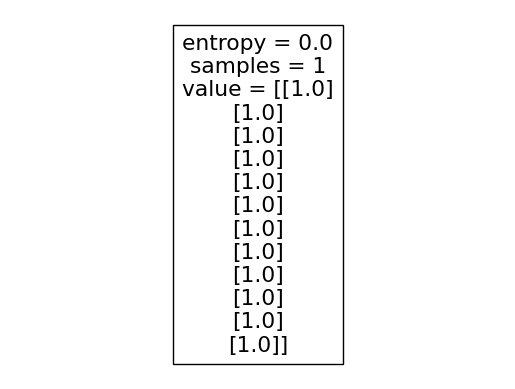

In [88]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
    
def classification_tree():
    
    # load data
    # iris_dataset = load_iris()
    
    # # split dataset
    # X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
    #                                                     iris_dataset['target'], 
    #                                                     test_size=0.20, 
    #                                                     random_state=0

    X_train = [[-2.1, -0.5,0,0.2,1.3,3.8,4.3,4.6,5.8,6.5,7.8,8.2]]
    y_train =[[1,0,0,0,1,1,0,0,1,1,1,1]]
    
    # fit tree
    dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
    dtree = dtree.fit(X_train, y_train)
    
    # predict
    y_trainpred = dtree.predict(X_train)
    #y_testpred = dtree.predict(X_test)
    
    # print accuracies
    print("Training accuracy: ", metrics.accuracy_score(y_train, y_trainpred))
    #print("Test accuracy: ", metrics.accuracy_score(y_test, y_testpred))    

    # Plot tree
    tree.plot_tree(dtree)

classification_tree()

### Rank

In [96]:
import numpy as np
from numpy.linalg import matrix_rank
X = np.array([[5, 0, 5], [10, 17, 10], [20, 0, 20]])
#X = np.array([[1, 0], [1, 1]])
print(matrix_rank(X))
print(X)

2
[[ 5  0  5]
 [10 17 10]
 [20  0 20]]


### Multiple orders polynomials

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import polyreg

np.set_printoptions(precision=4)
# training data
x = np.array([-10, -8, -3, -1, 2, 7]).reshape(-1, 1)
y = np.array([4.18, 2.42, 0.22, 0.12, 0.25, 3.09]).reshape(-1, 1)

# test data
xt = np.array([-9, -7, -5, -4, -2, 1, 4, 5, 6, 9]).reshape(-1, 1)
yt = np.array([3, 1.81, 0.80, 0.25, -0.19, 0.4, 1.24, 1.68, 2.32, 5.05]).reshape(-1, 1)
all_mse = []
all_w = []
for i in range(1, 6):
    w = polyreg.fit_primal(x, y, d=i, lmbda=-1)
    
    y_train_pred = polyreg.predict(x, w, d=i)
    train_mse = np.mean((y_train_pred - y) * (y_train_pred - y))

    y_test_pred = polyreg.predict(xt, w, d=i)
    test_mse = np.mean((y_test_pred - yt) * (y_test_pred - yt))

    all_w.append(w)
    all_mse.append((train_mse, test_mse))

w = polyreg.fit_dual(x, y, d=6, lmbda=-1)
    
y_train_pred = polyreg.predict(x, w, d=6)
train_mse = np.mean((y_train_pred - y) * (y_train_pred - y))

y_test_pred = polyreg.predict(xt, w, d=6)
test_mse = np.mean((y_test_pred - yt) * (y_test_pred - yt))

all_w.append(w)
all_mse.append((train_mse, test_mse))

### Order = 1, 2, 3, 4, 5, 6, with regularization (lambda = 1)

In [27]:
all_mse = []
all_w = []
for i in range(1, 7):
    w = polyreg.fit_primal(x, y, d=i, lmbda=1)
    
    y_train_pred = polyreg.predict(x, w, d=i)
    train_mse = np.mean((y_train_pred - y) * (y_train_pred - y))

    y_test_pred = polyreg.predict(xt, w, d=i)
    test_mse = np.mean((y_test_pred - yt) * (y_test_pred - yt))

    all_w.append(w)
    all_mse.append((train_mse, test_mse))

### K means clustering

In [94]:
# Data points
import numpy as np
x1 = np.array([0, 10])
x2 = np.array([0, 11]) 
x3 = np.array([0, 16])
x4 = np.array([0, 16]) 
x5 = np.array([0, 16])
x6 = np.array([0, 18]) 
x7 = np.array([0, 18])
x8 = np.array([0, 21])
x9 = np.array([0, 21])
x10 = np.array([0, 99])
data_points = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9])

c1_init = x1
c2_init = x4
c3_init = x8
centers = np.array([c1_init, c2_init, c3_init])

def k_means(data_points, centers, n_clusters, max_iterations=100, tol=1e-10):
    for _ in range(max_iterations):
        
        # Assign each data point to the closest centroid
        labels = np.argmin(
            np.linalg.norm(data_points[:, np.newaxis ] - centers , axis =2) 
            , axis =1)
        
        # Update centroids to be the mean of the data points assigned to them
        new_centers = np.zeros((n_clusters , data_points.shape[1]))
        
        # End if centroids no longer change
        for i in range(n_clusters):
            new_centers[i] = data_points[labels == i].mean(axis=0)
        
        if np.linalg.norm(new_centers - centers) < tol: 
            break
            
        centers = new_centers
    
    return centers , labels


centers, labels = k_means(data_points, centers, n_clusters=3, max_iterations = 100) 
print(labels)
print("Converged centers:", centers)

[0 0 1 1 1 1 1 2 2]
Converged centers: [[ 0.  10.5]
 [ 0.  16.8]
 [ 0.  21. ]]


In [92]:
import math

a = - (5/8)*math.log2(5/8) - (3/8)*math.log2(3/8) 
print(a)

0.954434002924965


In [93]:
a*(2/3)

0.63628933528331

In [89]:
n = 1 - (5/8)*(5/8) - (3/8)*(3/8)
print(n)

0.46875


In [90]:
n*(2/3)


0.3125